In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score as nmi
import datetime as dt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from scipy.stats import chi2
np.random.seed(10)

In [2]:
weather = pd.read_csv('weather_data_daily.csv', encoding ='unicode_escape')
display(weather.head())
weather.info()

,Date,Max of TOTALDEMAND,Max of PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,31,...,6,N,2,1018.8,28.1,43,5,E,13,1015.3
1,2/01/2021,4964.35,LOW,18.4,29.0,0.0,9.4,1.3,NNW,30,...,7,NNW,17,1013.3,28.7,38,7,SW,4,1008.5
2,3/01/2021,4503.31,LOW,17.0,26.2,12.6,4.8,7.1,WSW,33,...,8,WSW,4,1007.7,23.5,59,4,SSW,2,1005.2
3,4/01/2021,4764.18,LOW,16.0,18.6,2.6,3.8,0.0,SSE,41,...,8,SSE,11,1010.0,18.2,82,8,SSW,17,1011.0
4,5/01/2021,4800.64,LOW,15.9,19.1,11.2,1.0,0.0,SSE,35,...,8,SSE,13,1012.5,18.2,82,8,SSE,19,1013.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               240 non-null    object 
 1   Max of TOTALDEMAND                 240 non-null    float64
 2   Max of PRICECATEGORY               240 non-null    object 
 3   Minimum temperature (°C)           240 non-null    float64
 4   Maximum temperature (°C)           240 non-null    float64
 5   Rainfall (mm)                      240 non-null    float64
 6   Evaporation (mm)                   240 non-null    float64
 7   Sunshine (hours)                   240 non-null    float64
 8   Direction of maximum wind gust     240 non-null    object 
 9   Speed of maximum wind gust (km/h)  240 non-null    int64  
 10  Time of maximum wind gust          240 non-null    float64
 11  9am Temperature (°C)               240 non-null    float64

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Minimum temperature (°C)'>

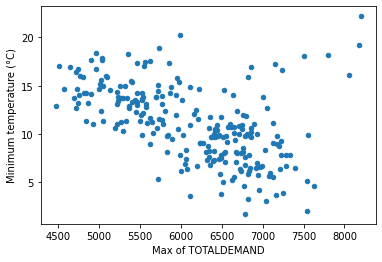

In [3]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Minimum temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Maximum temperature (°C)'>

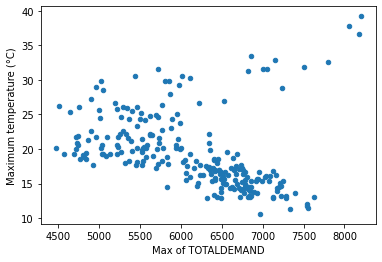

In [4]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Maximum temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Rainfall (mm)'>

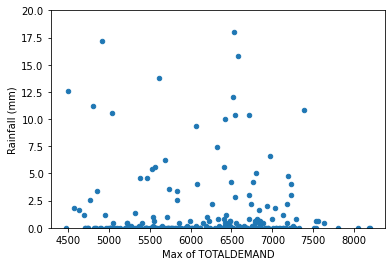

In [5]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Rainfall (mm)',ylim=(0,20))

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Evaporation (mm)'>

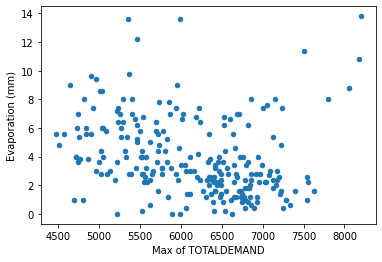

In [6]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Evaporation (mm)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Sunshine (hours)'>

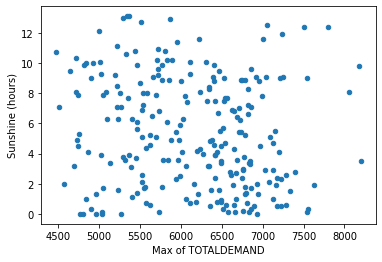

In [7]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Sunshine (hours)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Direction of maximum wind gust '>

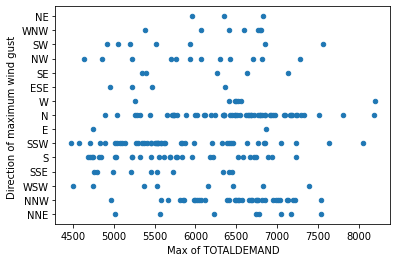

In [8]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Direction of maximum wind gust ')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Speed of maximum wind gust (km/h)'>

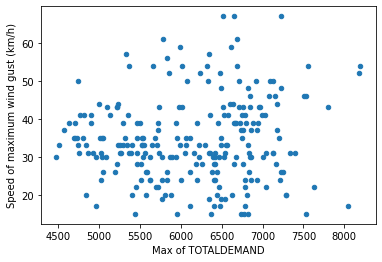

In [9]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Speed of maximum wind gust (km/h)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='Time of maximum wind gust'>

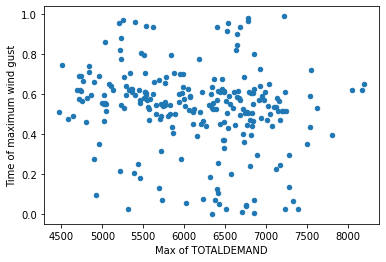

In [10]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = 'Time of maximum wind gust')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am Temperature (°C)'>

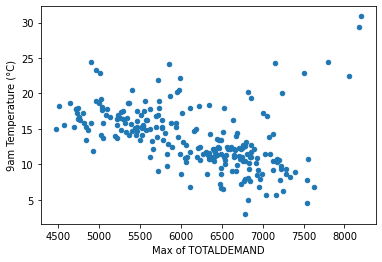

In [11]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am Temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am relative humidity (%)'>

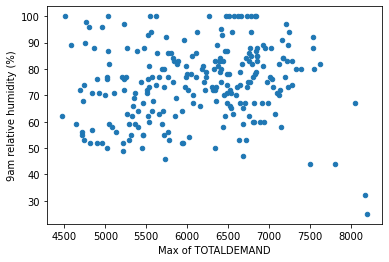

In [12]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am relative humidity (%)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am cloud amount (oktas)'>

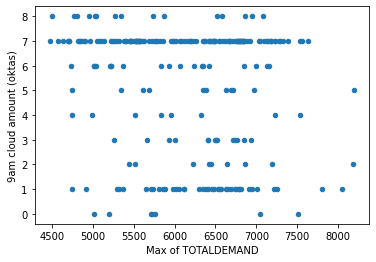

In [13]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am cloud amount (oktas)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am wind speed (km/h)'>

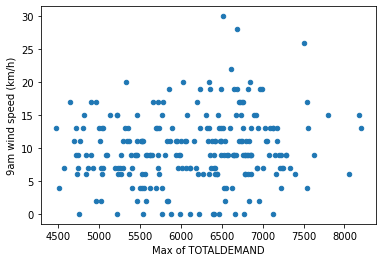

In [14]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am wind speed (km/h)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='9am MSL pressure (hPa)'>

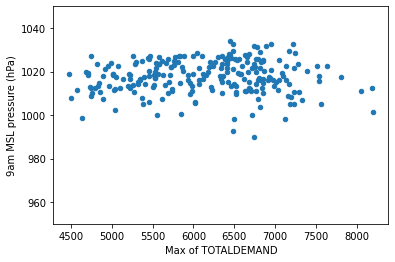

In [15]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '9am MSL pressure (hPa)',ylim=(950,1050))

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm Temperature (°C)'>

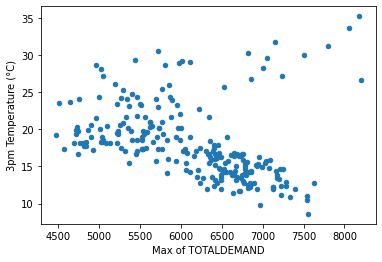

In [16]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm Temperature (°C)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm relative humidity (%)'>

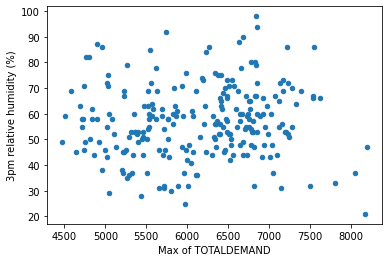

In [17]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm relative humidity (%)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm cloud amount (oktas)'>

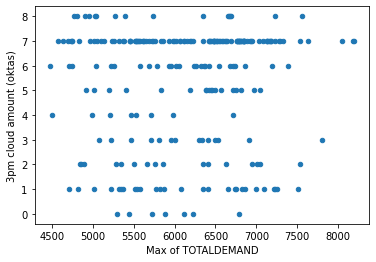

In [18]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm cloud amount (oktas)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm wind speed (km/h)'>

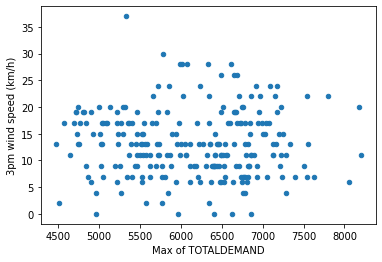

In [19]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm wind speed (km/h)')

<AxesSubplot:xlabel='Max of TOTALDEMAND', ylabel='3pm MSL pressure (hPa)'>

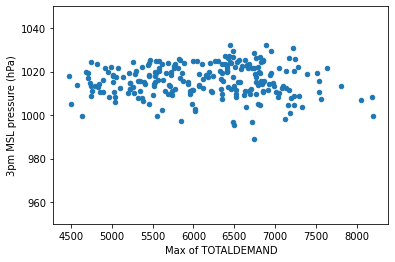

In [20]:
weather.plot.scatter(x = 'Max of TOTALDEMAND', y = '3pm MSL pressure (hPa)',ylim=(950,1050))

In [21]:
from scipy.stats import chi2_contingency 
print(weather['Max of PRICECATEGORY'].value_counts())

data = weather[['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
              '9am Temperature (°C)','9am wind speed (km/h)','3pm Temperature (°C)','3pm wind speed (km/h)']].astype(float)

classlabel = weather['Max of PRICECATEGORY']

chisqt = pd.crosstab()



MEDIUM     76
EXTREME    62
HIGH       61
LOW        41
Name: Max of PRICECATEGORY, dtype: int64


TypeError: crosstab() missing 2 required positional arguments: 'index' and 'columns'

In [22]:
##randomly select 80% of the instances to be training and the rest to be testing
X_train, X_test, y_train, y_test = train_test_split(data,classlabel, train_size=0.8, random_state=42)

#normalise the data to have 0 mean and unit variance using the library functions.  This will help for later
#computation of distances between instances
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred=knn.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.5625


In [24]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, data, classlabel, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
#print(‘cv_scores mean:{}’.format(np.mean(cv_scores)))
print(f"cv_scores mean :{np.mean(cv_scores)}")

[0.52083333 0.54166667 0.5        0.52083333 0.41666667]
cv_scores mean :0.5


In [25]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",random_state=42, max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [26]:
y_predict=dt.predict(X_test)
print(accuracy_score(y_test, y_predict))

0.4583333333333333


[Text(697.5, 951.3000000000001, '3pm Temperature (°C) <= -0.228\nentropy = 1.987\nsamples = 192\nvalue = [50, 48, 38, 56]'),
 Text(348.75, 679.5, 'Speed of maximum wind gust (km/h) <= -0.361\nentropy = 1.464\nsamples = 90\nvalue = [41, 35, 0, 14]'),
 Text(174.375, 407.70000000000005, 'Sunshine (hours) <= -0.336\nentropy = 0.824\nsamples = 31\nvalue = [23, 8, 0, 0]'),
 Text(87.1875, 135.89999999999998, 'entropy = 0.982\nsamples = 19\nvalue = [11, 8, 0, 0]'),
 Text(261.5625, 135.89999999999998, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(523.125, 407.70000000000005, 'Sunshine (hours) <= -0.601\nentropy = 1.531\nsamples = 59\nvalue = [18, 27, 0, 14]'),
 Text(435.9375, 135.89999999999998, 'entropy = 1.333\nsamples = 28\nvalue = [16, 9, 0, 3]'),
 Text(610.3125, 135.89999999999998, 'entropy = 1.241\nsamples = 31\nvalue = [2, 18, 0, 11]'),
 Text(1046.25, 679.5, 'Minimum temperature (°C) <= -0.261\nentropy = 1.746\nsamples = 102\nvalue = [9, 13, 38, 42]'),
 Text(871.875, 407.7

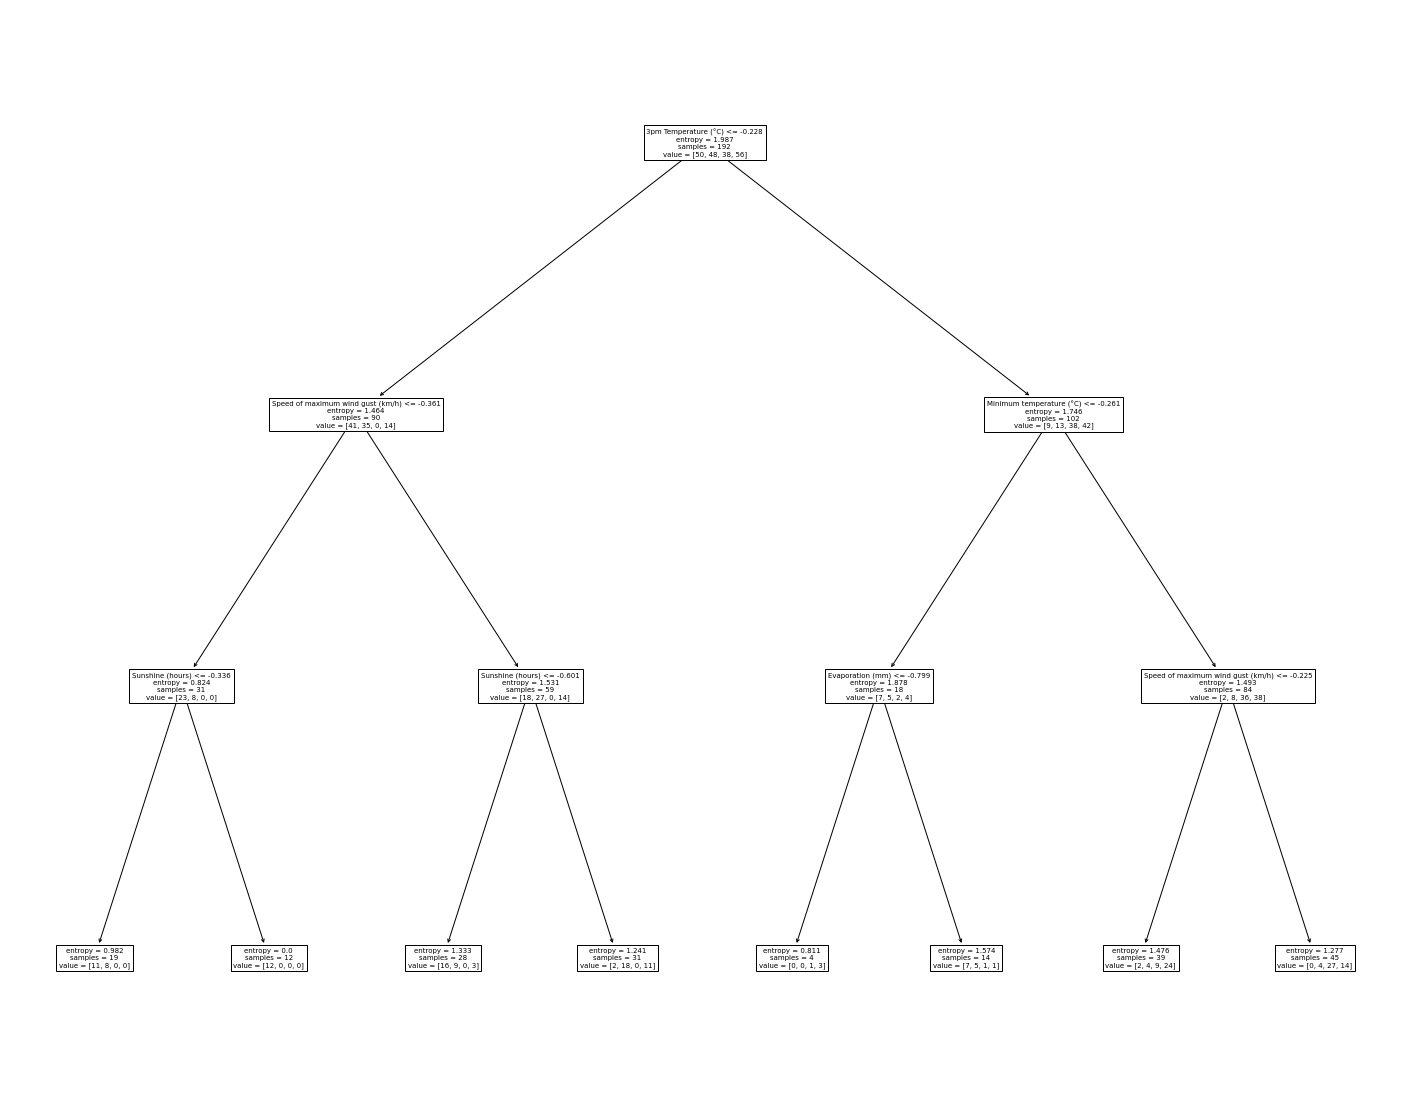

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
featurenames = ['Minimum temperature (°C)','Maximum temperature (°C)','Rainfall (mm)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
          '9am Temperature (°C)','9am wind speed (km/h)','3pm Temperature (°C)','3pm wind speed (km/h)']
tree.plot_tree(dt, feature_names=featurenames)

In [28]:
##  Example
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X= weather[['Minimum temperature (°C)','Maximum temperature (°C)','Evaporation (mm)','Sunshine (hours)','Speed of maximum wind gust (km/h)',\
          '9am Temperature (°C)','9am wind speed (km/h)','9am MSL pressure (hPa)','3pm Temperature (°C)',\
          '3pm wind speed (km/h)','3pm MSL pressure (hPa)']].astype(float)

y = weather['Max of TOTALDEMAND']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# partial code here...
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predictions = lm.predict(X_test)
print('actual TOTALDEMAND values of the first 5 test data:')
print(y_test[0:5])
print('')
print('predicted TOTALDEMAND values of the first 5 test data:')
print(y_test_predictions[0:5])
print('')

# coefficients

print('Coefficients: ', end = ' ')
print(lm.coef_)
print('')

# intercept:
print('Intercept: ', end = ' ')
print(lm.intercept_)
print('')

# R^2
r2_test = lm.score(X_test, y_test)
r2_train = lm.score(X_train, y_train)

print('Coefficient of determination (test): {0:.2f}'.format(r2_test))
print('Coefficient of determination (training): {0:.2f}'.format(r2_train))



actual TOTALDEMAND values of the first 5 test data:
24     5035.74
6      4994.78
93     5078.44
109    6539.68
104    6202.21
Name: Max of TOTALDEMAND, dtype: float64

predicted TOTALDEMAND values of the first 5 test data:
[5372.19922273 5471.03039084 5167.9099038  6249.64420761 6000.19403462]

Coefficients:  [-162.2051688   120.33211599   21.55383269  -38.81687563    6.2383068
   17.58211344   15.31778169    0.4246323  -105.24390105  -12.63429327
    0.24603516]

Intercept:  6478.241135186869

Coefficient of determination (test): 0.28
Coefficient of determination (training): 0.36


In [29]:
r2_test = lm.score(X_test, y_test)
print(r2_test)

0.27747121421848
